# **Práctico Nro. 1**



## **Ejercicio Nro. 1**

## Carga de librerías

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Lectura del csv

In [ ]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."


## Exploro el dataset


In [ ]:
# guardo el dataset en una tabla
tabla_1 = pd.read_csv(BASE_DIR + "/input/wtageinf.csv")
# leo los primeros 10 datos
print('Tabla de crecimiento \n')
tabla_1.head(10)

Tabla de crecimiento 



,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [ ]:
# verifico cantidad de filas y columnas del dataset
tabla_1.shape
print ("Luego de la limpieza, obtengo un dataframe de", tabla_1.shape[0],"filas y", tabla_1.shape[1], "col.")


Luego de la limpieza, obtengo un dataframe de 76 filas y 14 col.


In [ ]:
# reviso las columnas del dataset
tabla_1.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

## Visualización de datos

### Gráfico de las curvas de percentiles correspondientes a niños

Text(0, 0.5, 'Peso')

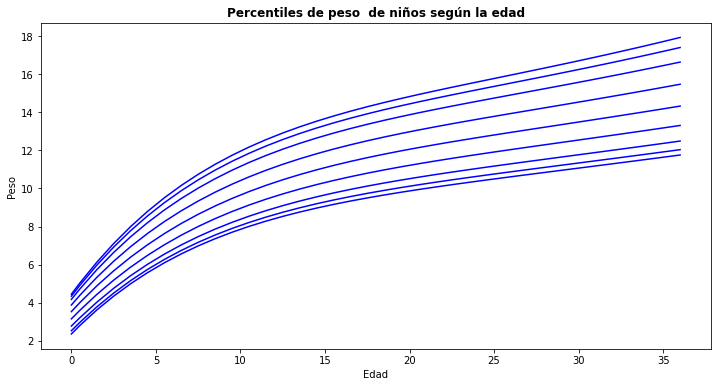

In [ ]:
# gráfico de percentiles con peso de niños (sexo=1) 
filtrado= tabla_1[tabla_1.Sex==1]

plt.figure(figsize=(12,6))
seaborn.lineplot(data= filtrado, x="Agemos", y='P3', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P5', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P10', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P25', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P50', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P75', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P90', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P95', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P97', color='BLUE')
plt.title('Percentiles de peso  de niños según la edad',
             fontsize=12, weight="bold")
plt.xlabel('Edad')
plt.ylabel('Peso')

### Gráfico de las curvas de percentiles correspondientes a niñas

Text(0, 0.5, 'Peso')

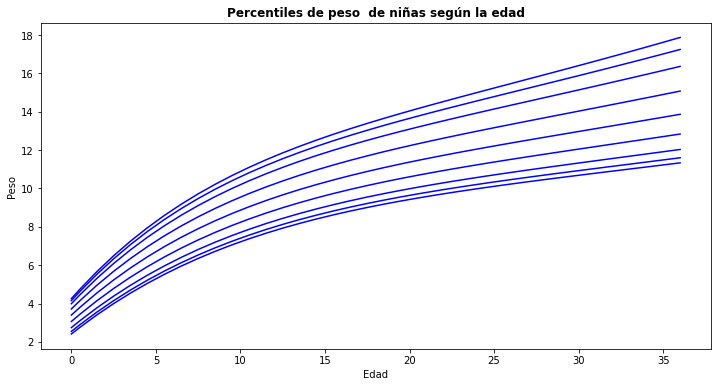

In [ ]:
# gráfico de percentiles con peso de Niñas (sexo=2)
filtrado= tabla_1[tabla_1.Sex==2]
plt.figure(figsize=(12,6))

seaborn.lineplot(data= filtrado, x="Agemos", y='P3', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P5', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P10', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P25', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P50', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P75', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P90', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P95', color='BLUE')
seaborn.lineplot(data= filtrado, x="Agemos", y='P97', color='BLUE')
plt.title('Percentiles de peso  de niñas según la edad',
             fontsize=12, weight="bold")
plt.xlabel('Edad')
plt.ylabel('Peso')

## **Ejercicio Nro. 2: Pasos Fronterizos**

 Cantidad de pasos fronterizos por provincia

### Lectura del archivo json

In [ ]:
pasos = pd.read_json(BASE_DIR + "/input/pasos.json")
pasos

,province,location,name
0,Tierra del Fuego,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA )
1,Tierra del Fuego,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA
2,Tierra del Fuego,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA)
3,Tierra del Fuego,"[-54.8019121, -68.3029511]",PUERTO USHUAIA
4,Santa Cruz,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS
...,...,...,...
247,Chubut,"[-45.2213569, -71.3610803]",PASO PAMPA ALTA
248,Santa Cruz,"[-48.8772007, -72.7288579]",PASO PORTEZUELO DE LA DIVISORIA
249,Buenos Aires,"[-34.1176359, -57.9897668]",ROU COLONIA
250,Buenos Aires,"[-34.1176359, -57.9897668]",ROU COLONIA


### Curación de datos

In [ ]:
# se convierten todos los caracteres a mayúsculas para unificar los valores 
pasos["province"] = pasos.province.str.upper()  #lower


El aeropuerto Norberto Fernandez está en Santa Cruz, así que realizamos la corrección.

In [ ]:
pasos["province"] = pasos.province.str.replace("AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ", "SANTA CRUZ")
pasos["province"] = pasos.province.str.replace("CORDOBA", "CÓRDOBA")
pasos["province"] = pasos.province.str.replace("NEUQUEN", "NEUQUÉN")
pasos["province"] = pasos.province.str.replace("TUCUMAN", "TUCUMÁN")

### Gráfico de barras con la cantidad de pasos fronterizos por provincia

Text(0, 0.5, 'Cantidad de pasos fronterizos')

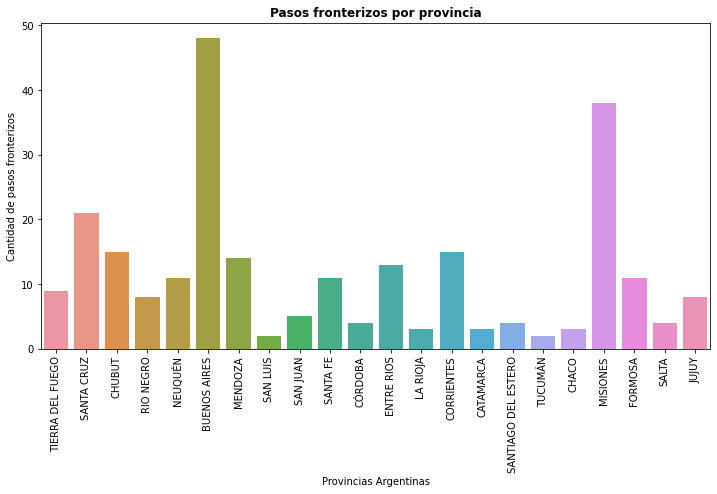

In [ ]:
plt.figure(figsize=(12,6))
seaborn.countplot(x=pasos.province)
plt.xticks(rotation=90)
plt.title('Pasos fronterizos por provincia',
             fontsize=12, weight="bold")
plt.xlabel('Provincias Argentinas')
plt.ylabel('Cantidad de pasos fronterizos')

## **Ejercicio Nro. 3: Representación de Grafos**


Grafo como lista de aristas

In [ ]:
edgeList = [ [0, 2], [1, 3], [2, 3], [2, 4], [3, 5], [4, 5] ];

¿Cómo sería la representación del grafo anterior como matriz de adyacencia (adjMatrix = [...]) y como lista de adyacencia (adjList = [...])?

In [ ]:
# Tres formas distintas de representar un grafo:

# 1. Como lista de aristas
edgeList = [ [0, 2], [1, 3], [2, 3], [2, 4], [3, 5], [4, 5] ]

# 2. Como matriz de adyacencia
adjMatrix = [[0,0,1,0,0,0],
             [0,0,0,1,0,0],
             [0,0,0,1,1,0],
             [0,0,0,0,0,1],
             [0,0,0,0,0,1],
             [0,0,0,0,0,0]]

# 3. Como lista de adyacencia             
adjList = [[2],
           [3],
           [3,4],
           [5],
           [5],
           []]